In [1]:
import mysql.connector
import random
import time
import matplotlib.pyplot as plt
from tqdm import (
    tqdm,
)


In [ ]:
conn = mysql.connector.connect(
    host="localhost", 
    user="root", 
    password="rajpootchauhan"
    )

cursor = conn.cursor()

cursor.execute("DROP DATABASE IF EXISTS facebook_data_abd")


cursor.execute("CREATE DATABASE facebook_data_abd")

cursor.close()
conn.close()

In [3]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="rajpootchauhan",
    database="facebook_data_abd",
    autocommit=True,
)

cursor = conn.cursor()

cursor.close()
conn.close()

Creating Facebook-like tables...
Tables created successfully.
Populating tables with 1000 records...


Inserting 100 friendships: 100%|██████████| 100/100 [00:00<00:00, 7844.95friendship/s]


Tables populated with 1000 records.
Running queries for 1000 records...
Running Query 1...
Query 1 completed in 0.0049 seconds
Running Query 2...
Query 2 completed in 0.0016 seconds
Running Query 3...
Query 3 completed in 0.0014 seconds
Running Query 4...
Query 4 completed in 0.0020 seconds
Running Query 5...
Query 5 completed in 0.0003 seconds
Populating tables with 10000 records...


Inserting 1000 friendships: 100%|██████████| 1000/1000 [00:00<00:00, 6973.06friendship/s]


Tables populated with 10000 records.
Running queries for 10000 records...
Running Query 1...
Query 1 completed in 0.0072 seconds
Running Query 2...
Query 2 completed in 0.0131 seconds
Running Query 3...
Query 3 completed in 0.0142 seconds
Running Query 4...
Query 4 completed in 0.0250 seconds
Running Query 5...
Query 5 completed in 0.0063 seconds
Populating tables with 100000 records...


Inserting 10000 friendships: 100%|██████████| 10000/10000 [00:01<00:00, 7867.42friendship/s]


Tables populated with 100000 records.
Running queries for 100000 records...
Running Query 1...
Query 1 completed in 0.0655 seconds
Running Query 2...
Query 2 completed in 0.1119 seconds
Running Query 3...
Query 3 completed in 0.1415 seconds
Running Query 4...
Query 4 completed in 0.2947 seconds
Running Query 5...
Query 5 completed in 0.0108 seconds
Populating tables with 1000000 records...


Inserting 100000 friendships: 100%|██████████| 100000/100000 [00:14<00:00, 6895.01friendship/s]


Tables populated with 1000000 records.
Running queries for 1000000 records...
Running Query 1...
Query 1 completed in 0.6422 seconds
Running Query 2...
Query 2 completed in 1.2394 seconds
Running Query 3...
Query 3 completed in 3.3855 seconds
Running Query 4...
Query 4 completed in 12.0672 seconds
Running Query 5...
Query 5 completed in 1.0423 seconds


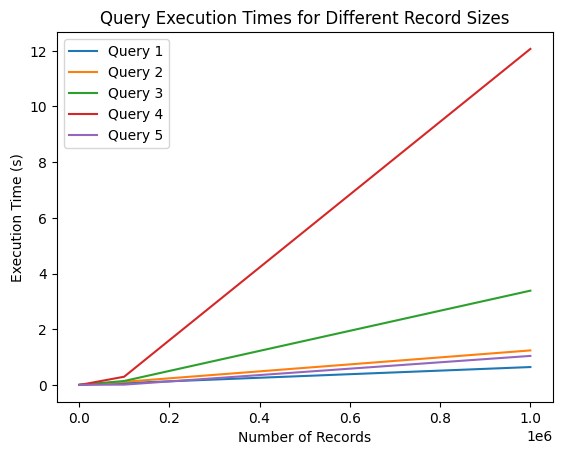

In [3]:
def get_connection():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="root",
        database="facebook_data_abd",
        autocommit=True,
    )


conn = get_connection()
cursor = conn.cursor()


def create_facebook_tables():
    print("Creating Facebook-like tables...")
    cursor.execute(
        """
    CREATE TABLE IF NOT EXISTS users (
        user_id INT PRIMARY KEY AUTO_INCREMENT,
        name VARCHAR(100),
        email VARCHAR(100),
        age INT
    )"""
    )

    cursor.execute(
        """
    CREATE TABLE IF NOT EXISTS posts (
        post_id INT PRIMARY KEY AUTO_INCREMENT,
        user_id INT,
        content TEXT,
        created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
        FOREIGN KEY (user_id) REFERENCES users(user_id)
    )"""
    )

    cursor.execute(
        """
    CREATE TABLE IF NOT EXISTS comments (
        comment_id INT PRIMARY KEY AUTO_INCREMENT,
        post_id INT,
        user_id INT,
        content TEXT,
        created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
        FOREIGN KEY (post_id) REFERENCES posts(post_id),
        FOREIGN KEY (user_id) REFERENCES users(user_id)
    )"""
    )

    cursor.execute(
        """
    CREATE TABLE IF NOT EXISTS friendships (
        user1_id INT,
        user2_id INT,
        PRIMARY KEY (user1_id, user2_id),
        FOREIGN KEY (user1_id) REFERENCES users(user_id),
        FOREIGN KEY (user2_id) REFERENCES users(user_id)
    )"""
    )

    conn.commit()
    print("Tables created successfully.")


def populate_facebook_tables(record_count):
    print(f"Populating tables with {record_count} records...")

    for i in tqdm(
        range(1, record_count + 1), desc=f"Inserting {record_count} users", unit="user"
    ):
        cursor.execute(
            f"INSERT INTO users (name, email, age) VALUES ('User{i}', 'user{i}@example.com', {random.randint(18, 70)})"
        )

    for i in tqdm(
        range(1, record_count + 1), desc=f"Inserting {record_count} posts", unit="post"
    ):
        cursor.execute(
            f"INSERT INTO posts (user_id, content) VALUES ({random.randint(1, record_count)}, 'This is post content {i}')"
        )

    for i in tqdm(
        range(1, record_count + 1),
        desc=f"Inserting {record_count} comments",
        unit="comment",
    ):
        cursor.execute(
            f"INSERT INTO comments (post_id, user_id, content) VALUES ({random.randint(1, record_count)}, {random.randint(1, record_count)}, 'This is comment content {i}')"
        )

    for i in tqdm(
        range(1, record_count // 10 + 1),
        desc=f"Inserting {record_count // 10} friendships",
        unit="friendship",
    ):
        user1 = random.randint(1, record_count)
        user2 = random.randint(1, record_count)
        if user1 != user2:
            cursor.execute(
                f"INSERT INTO friendships (user1_id, user2_id) VALUES ({user1}, {user2})"
            )

    conn.commit()
    print(f"Tables populated with {record_count} records.")


def run_queries(record_count):
    print(f"Running queries for {record_count} records...")

    queries = [
        # simple
        
        "SELECT * FROM users WHERE age > 30",
        "SELECT * FROM posts WHERE content LIKE '%post%'",
        # moderate
        
        """SELECT u.name, p.content 
           FROM users u
           JOIN posts p ON u.user_id = p.user_id
           WHERE u.age > 30""",
        # complex
        
        """SELECT u.name, p.content, c.content AS comment_content 
           FROM users u
           JOIN posts p ON u.user_id = p.user_id
           JOIN comments c ON p.post_id = c.post_id
           WHERE u.age > 30""",
        """SELECT u1.name AS user1_name, u2.name AS user2_name 
           FROM friendships f
           JOIN users u1 ON f.user1_id = u1.user_id
           JOIN users u2 ON f.user2_id = u2.user_id
           WHERE u1.age > 30""",
    ]

    query_times = []

    for i, query in enumerate(queries):
        print(f"Running Query {i + 1}...")
        start_time = time.time()
        cursor.execute(query)
        cursor.fetchall()
        end_time = time.time()
        query_time = end_time - start_time
        query_times.append(query_time)
        print(f"Query {i + 1} completed in {query_time:.4f} seconds")

    return query_times


def plot_execution_times(query_times, record_sizes):
    queries = ["Query 1", "Query 2", "Query 3", "Query 4", "Query 5"]

    for i, query in enumerate(queries):
        plt.plot(record_sizes, [qt[i] for qt in query_times], label=query)

    plt.xlabel("Number of Records")
    plt.ylabel("Execution Time (s)")
    plt.title("Query Execution Times for Different Record Sizes")
    plt.legend()
    plt.show()


create_facebook_tables()

record_sizes = [1000, 10000, 100000, 1000000]
all_query_times = []

for record_count in record_sizes:
    populate_facebook_tables(record_count)
    query_times = run_queries(record_count)
    all_query_times.append(query_times)


plot_execution_times(all_query_times, record_sizes)

cursor.close()
conn.close()

In [ ]:

def run_queries(record_count):
    print(f"Running queries for {record_count} records...")

    queries = [
        # simple
        "SELECT * FROM users WHERE age > 30",
        "SELECT * FROM posts WHERE content LIKE '%post%'",
        # moderate
        """SELECT u.name, p.content 
           FROM users u
           JOIN posts p ON u.user_id = p.user_id
           WHERE u.age > 30""",
        # complex
        """SELECT u.name, p.content, c.content AS comment_content 
           FROM users u
           JOIN posts p ON u.user_id = p.user_id
           JOIN comments c ON p.post_id = c.post_id
           WHERE u.age > 30""",
        """SELECT u1.name AS user1_name, u2.name AS user2_name 
           FROM friendships f
           JOIN users u1 ON f.user1_id = u1.user_id
           JOIN users u2 ON f.user2_id = u2.user_id
           WHERE u1.age > 30""",
        """SELECT p.content AS post_content, 
            COUNT(DISTINCT c.comment_id) AS comment_count, 
            COUNT(DISTINCT l.like_id) AS like_count 
            FROM posts p
            JOIN users u ON p.user_id = u.user_id
            LEFT JOIN comments c ON p.post_id = c.post_id
            LEFT JOIN likes l ON p.post_id = l.post_id
            WHERE u.age > 30
            GROUP BY p.post_id
            ORDER BY p.created_at DESC""",
    ]

    query_times = []

    for i, query in enumerate(queries):
        print(f"Running Query {i + 1}...")
        start_time = time.time()
        cursor.execute(query)
        cursor.fetchall()
        end_time = time.time()
        query_time = end_time - start_time
        query_times.append(query_time)
        print(f"Query {i + 1} completed in {query_time:.4f} seconds")

    return query_times


def plot_execution_times(query_times, record_sizes):
    queries = ["Query 1", "Query 2", "Query 3", "Query 4", "Query 5"]

    for i, query in enumerate(queries):
        plt.plot(record_sizes, [qt[i] for qt in query_times], label=query)

    plt.xlabel("Number of Records")
    plt.ylabel("Execution Time (s)")
    plt.title("Query Execution Times for Different Record Sizes")
    plt.legend()
    plt.show()


record_sizes = [1000, 10000, 100000, 1000000]
all_query_times = []

for record_count in record_sizes:
    populate_facebook_tables(record_count)
    query_times = run_queries(record_count)
    all_query_times.append(query_times)


plot_execution_times(all_query_times, record_sizes)

Creating indexes...
Indexes created successfully.
Running queries with indexes for 1000 records...
Running Query 1 with indexes...
Query 1 completed in 0.6485 seconds
Running Query 2 with indexes...
Query 2 completed in 1.1791 seconds
Running Query 3 with indexes...
Query 3 completed in 3.0368 seconds
Running Query 4 with indexes...
Query 4 completed in 6.8508 seconds
Running Query 5 with indexes...
Query 5 completed in 1.1414 seconds
Running queries with indexes for 10000 records...
Running Query 1 with indexes...
Query 1 completed in 0.6628 seconds
Running Query 2 with indexes...
Query 2 completed in 1.1653 seconds
Running Query 3 with indexes...
Query 3 completed in 3.1412 seconds
Running Query 4 with indexes...
Query 4 completed in 6.6801 seconds
Running Query 5 with indexes...
Query 5 completed in 0.9573 seconds
Running queries with indexes for 100000 records...
Running Query 1 with indexes...
Query 1 completed in 0.6550 seconds
Running Query 2 with indexes...
Query 2 completed in

ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

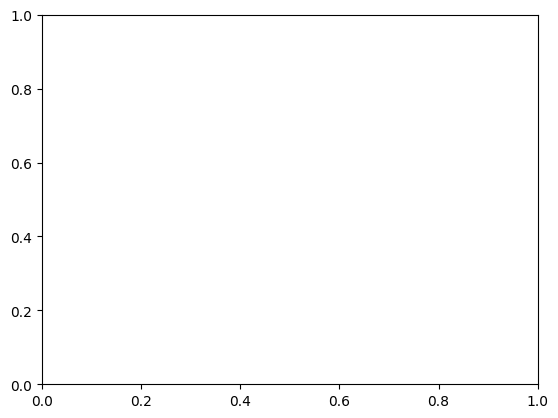

In [5]:
import mysql.connector
import random
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

# Establish the MySQL connection
def get_connection():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="rajpootchauhan",
        database="facebook_data_abd",
        autocommit=True,
    )

# Create a connection and cursor
conn = get_connection()
cursor = conn.cursor()

# Function to create tables
def create_facebook_tables():
    print("Creating Facebook-like tables...")
    cursor.execute(
        """
        CREATE TABLE IF NOT EXISTS users (
            user_id INT PRIMARY KEY AUTO_INCREMENT,
            name VARCHAR(100),
            email VARCHAR(100),
            age INT
        )"""
    )

    cursor.execute(
        """
        CREATE TABLE IF NOT EXISTS posts (
            post_id INT PRIMARY KEY AUTO_INCREMENT,
            user_id INT,
            content TEXT,
            created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
            FOREIGN KEY (user_id) REFERENCES users(user_id)
        )"""
    )

    cursor.execute(
        """
        CREATE TABLE IF NOT EXISTS comments (
            comment_id INT PRIMARY KEY AUTO_INCREMENT,
            post_id INT,
            user_id INT,
            content TEXT,
            created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
            FOREIGN KEY (post_id) REFERENCES posts(post_id),
            FOREIGN KEY (user_id) REFERENCES users(user_id)
        )"""
    )

    cursor.execute(
        """
        CREATE TABLE IF NOT EXISTS friendships (
            user1_id INT,
            user2_id INT,
            PRIMARY KEY (user1_id, user2_id),
            FOREIGN KEY (user1_id) REFERENCES users(user_id),
            FOREIGN KEY (user2_id) REFERENCES users(user_id)
        )"""
    )

    conn.commit()
    print("Tables created successfully.")

# Function to populate tables with random data
def populate_facebook_tables(record_count):
    print(f"Populating tables with {record_count} records...")

    for i in tqdm(
        range(1, record_count + 1), desc=f"Inserting {record_count} users", unit="user"
    ):
        cursor.execute(
            f"INSERT INTO users (name, email, age) VALUES ('User{i}', 'user{i}@example.com', {random.randint(18, 70)})"
        )

    for i in tqdm(
        range(1, record_count + 1), desc=f"Inserting {record_count} posts", unit="post"
    ):
        cursor.execute(
            f"INSERT INTO posts (user_id, content) VALUES ({random.randint(1, record_count)}, 'This is post content {i}')"
        )

    for i in tqdm(
        range(1, record_count + 1),
        desc=f"Inserting {record_count} comments",
        unit="comment",
    ):
        cursor.execute(
            f"INSERT INTO comments (post_id, user_id, content) VALUES ({random.randint(1, record_count)}, {random.randint(1, record_count)}, 'This is comment content {i}')"
        )

    for i in tqdm(
        range(1, record_count // 10 + 1),
        desc=f"Inserting {record_count // 10} friendships",
        unit="friendship",
    ):
        user1 = random.randint(1, record_count)
        user2 = random.randint(1, record_count)
        if user1 != user2:
            cursor.execute(
                f"INSERT INTO friendships (user1_id, user2_id) VALUES ({user1}, {user2})"
            )

    conn.commit()
    print(f"Tables populated with {record_count} records.")

# Function to create indexes
def create_indexes():
    print("Creating indexes...")
    cursor.execute("CREATE INDEX idx_user_id ON users(user_id);")
    cursor.execute("CREATE INDEX idx_post_user_id ON posts(user_id);")
    cursor.execute("CREATE INDEX idx_post_id ON comments(post_id);")
    cursor.execute("CREATE INDEX idx_friendship_user1 ON friendships(user1_id);")
    cursor.execute("CREATE INDEX idx_friendship_user2 ON friendships(user2_id);")
    cursor.execute("CREATE INDEX idx_friendship_user_id ON users(user_id);")
    conn.commit()
    print("Indexes created successfully.")

# Function to run queries
def run_queries(record_count):
    print(f"Running queries for {record_count} records...")

    queries = [
        "SELECT * FROM users WHERE age > 30",
        "SELECT * FROM posts WHERE content LIKE '%post%'",
        """SELECT u.name, p.content 
           FROM users u
           JOIN posts p ON u.user_id = p.user_id
           WHERE u.age > 30""",
        """SELECT u.name, p.content, c.content AS comment_content 
           FROM users u
           JOIN posts p ON u.user_id = p.user_id
           JOIN comments c ON p.post_id = c.post_id
           WHERE u.age > 30""",
        """SELECT u1.name AS user1_name, u2.name AS user2_name 
           FROM friendships f
           JOIN users u1 ON f.user1_id = u1.user_id
           JOIN users u2 ON f.user2_id = u2.user_id
           WHERE u1.age > 30""",
    ]

    query_times = []

    for i, query in enumerate(queries):
        print(f"Running Query {i + 1}...")
        start_time = time.time()
        cursor.execute(query)
        cursor.fetchall()
        end_time = time.time()
        query_time = end_time - start_time
        query_times.append(query_time)
        print(f"Query {i + 1} completed in {query_time:.4f} seconds")

    return query_times

# Function to run queries with indexes
def run_queries_with_indexes(record_count):
    print(f"Running queries with indexes for {record_count} records...")

    queries = [
        "SELECT * FROM users WHERE age > 30",
        "SELECT * FROM posts WHERE content LIKE '%post%'",
        """SELECT u.name, p.content 
           FROM users u
           JOIN posts p ON u.user_id = p.user_id
           WHERE u.age > 30""",
        """SELECT u.name, p.content, c.content AS comment_content 
           FROM users u
           JOIN posts p ON u.user_id = p.user_id
           JOIN comments c ON p.post_id = c.post_id
           WHERE u.age > 30""",
        """SELECT u1.name AS user1_name, u2.name AS user2_name 
           FROM friendships f
           JOIN users u1 ON f.user1_id = u1.user_id
           JOIN users u2 ON f.user2_id = u2.user_id
           WHERE u1.age > 30""",
    ]

    query_times = []

    for i, query in enumerate(queries):
        print(f"Running Query {i + 1} with indexes...")
        start_time = time.time()
        cursor.execute(query)
        cursor.fetchall()
        end_time = time.time()
        query_time = end_time - start_time
        query_times.append(query_time)
        print(f"Query {i + 1} completed in {query_time:.4f} seconds")

    return query_times

# Function to plot execution times
def plot_execution_times(times_without_indexes, times_with_indexes, record_sizes):
    queries = ["Query 1", "Query 2", "Query 3", "Query 4", "Query 5"]

    for i, query in enumerate(queries):
        plt.plot(record_sizes, [qt[i] for qt in times_without_indexes], label=f"{query} Without Index")
        plt.plot(record_sizes, [qt[i] for qt in times_with_indexes], label=f"{query} With Index", linestyle='--')

    plt.xlabel("Number of Records")
    plt.ylabel("Execution Time (s)")
    plt.title("Query Execution Times: With vs. Without Indexes")
    plt.legend()
    plt.show()


# List of record sizes
record_sizes = [1000, 10000, 100000, 1000000]
all_query_times = []
all_query_times_with_indexes = []

# Create indexes
create_indexes()

# Run queries with indexes
for record_count in record_sizes:
    query_times_with_indexes = run_queries_with_indexes(record_count)
    all_query_times_with_indexes.append(query_times_with_indexes)

# Plot the performance comparison
plot_execution_times(all_query_times, all_query_times_with_indexes, record_sizes)

# Clean up
cursor.close()
conn.close()